## Spotify Music Data Analysis

In this project, we will anaslyse data from Spotify.

We will aim to answer the following questions:
1. What makes a song popular?
2. How have musical tastes evolved over the decades?
3. What is the optimal song length and tempo for maximum popularity?

In [ ]:
pip install pandas numpy matplotlib seaborn jupyter 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load my data
df = pd.read_csv('C:\\Users\\Lana0\\Documents\\spotify-music-analysis\\data\\raw\\dataset.csv')

print(df.shape)
print(df.head())
print(df.info())

(114000, 21)
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826 

In [12]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display basic info
print("\n📊 Dataset Overview:")
print(df.head())

print(f"\n📈 Dataset Info:")
print(df.info())

print(f"\n🔍 Missing Values:")
print(df.isnull().sum())

# Basic statistics
print(f"\n📋 Basic Statistics:")
print(df.describe())

print(f"After cleaning - Shape: {df.shape}")

Dataset shape: (114000, 21)
Columns: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']

📊 Dataset Overview:
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou..

## Data Cleaning

In [10]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if any
df = df.drop_duplicates()

Duplicate rows: 0


In [13]:
# Check which rows have missing values
print("Rows with missing artist names:", df['artists'].isnull().sum())
print("Rows with missing album names:", df['album_name'].isnull().sum()) 
print("Rows with missing track names:", df['track_name'].isnull().sum())


Rows with missing artist names: 1
Rows with missing album names: 1
Rows with missing track names: 1


In [16]:
# Fill missing values with placeholders
df['artists'] = df['artists'].fillna('Unknown Artist')
df['album_name'] = df['album_name'].fillna('Unknown Album')
df['track_name'] = df['track_name'].fillna('Unknown Track')
print(f"\n🔍 Missing Values:")
print(df.isnull().sum())


print(f"After cleaning - Shape: {df.shape}")



🔍 Missing Values:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64
After cleaning - Shape: (114000, 21)


## Exploratory Data Analysis

Text(0.5, 1.0, 'Audio Features Correlation')

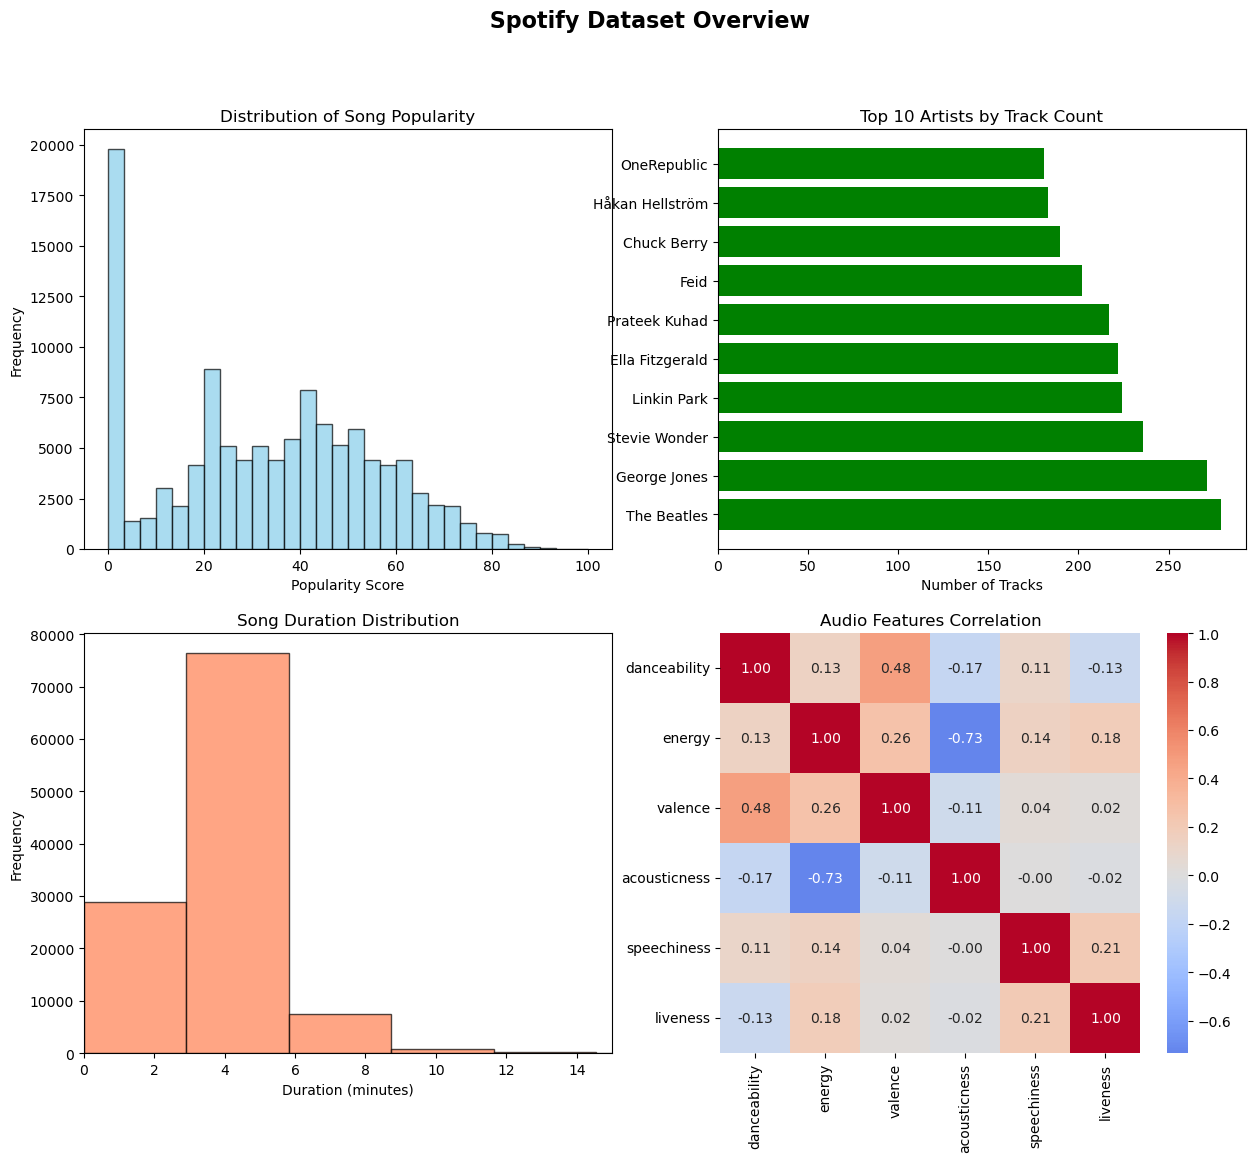

In [42]:
# Define available audio features for this dataset
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'speechiness', 
                 'liveness', 'instrumentalness', 'loudness', 'tempo']
#  Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(' Spotify Dataset Overview', fontsize=16, fontweight='bold')
# Plot 1: Distribution of Popularity
if 'popularity' in df.columns:
    axes[0,0].hist(df['popularity'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Distribution of Song Popularity')
    axes[0,0].set_xlabel('Popularity Score')
    axes[0,0].set_ylabel('Frequency')
    
# Plot 2: Artist Distribution
    top_artists = df['artists'].value_counts().head(10)
    axes[0,1].barh(range(len(top_artists)), top_artists.values, color='green')
    axes[0,1].set_yticks(range(len(top_artists)))
    axes[0,1].set_yticklabels(top_artists.index)
    axes[0,1].set_title('Top 10 Artists by Track Count')
    axes[0,1].set_xlabel('Number of Tracks')

# Plot 3: Duration Distribution
axes[1,0].hist(df['duration_ms']/1000/60, bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[1,0].set_title('Song Duration Distribution')
axes[1,0].set_xlabel('Duration (minutes)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_xlim(0,15)

# Plot 4: Audio Features Correlation
correlation_features = ['danceability', 'energy', 'valence', 'acousticness', 'speechiness', 'liveness']
correlation_matrix = df[correlation_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            ax=axes[1,1], square=True, fmt='.2f')
axes[1,1].set_title('Audio Features Correlation')



  

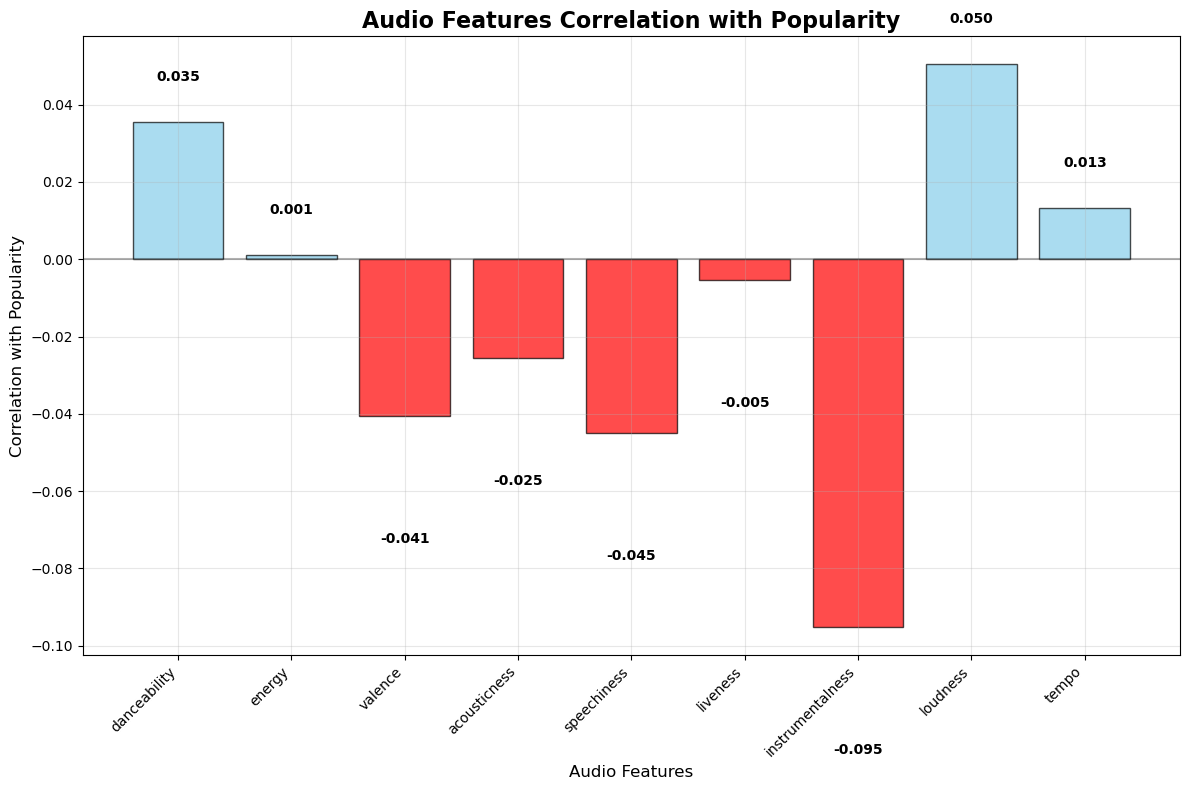

In [44]:
# Calculate correlations for all audio features
audio_features_list = ['danceability', 'energy', 'valence', 'acousticness', 
                      'speechiness', 'liveness', 'instrumentalness', 'loudness', 'tempo']

correlations = []
for feature in audio_features_list:
    corr = df[feature].corr(df['popularity'])
    correlations.append(corr)

# Create correlation bar chart
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
colors = ['red' if x < 0 else 'skyblue' for x in correlations]
bars = ax.bar(audio_features_list, correlations, color=colors, alpha=0.7, edgecolor='black')

# Customize the plot
ax.set_title('Audio Features Correlation with Popularity', fontsize=16, fontweight='bold')
ax.set_xlabel('Audio Features', fontsize=12)
ax.set_ylabel('Correlation with Popularity', fontsize=12)
ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add correlation values on top of bars
for bar, corr in zip(bars, correlations):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.03),
            f'{corr:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.tight_layout()

plt.show()


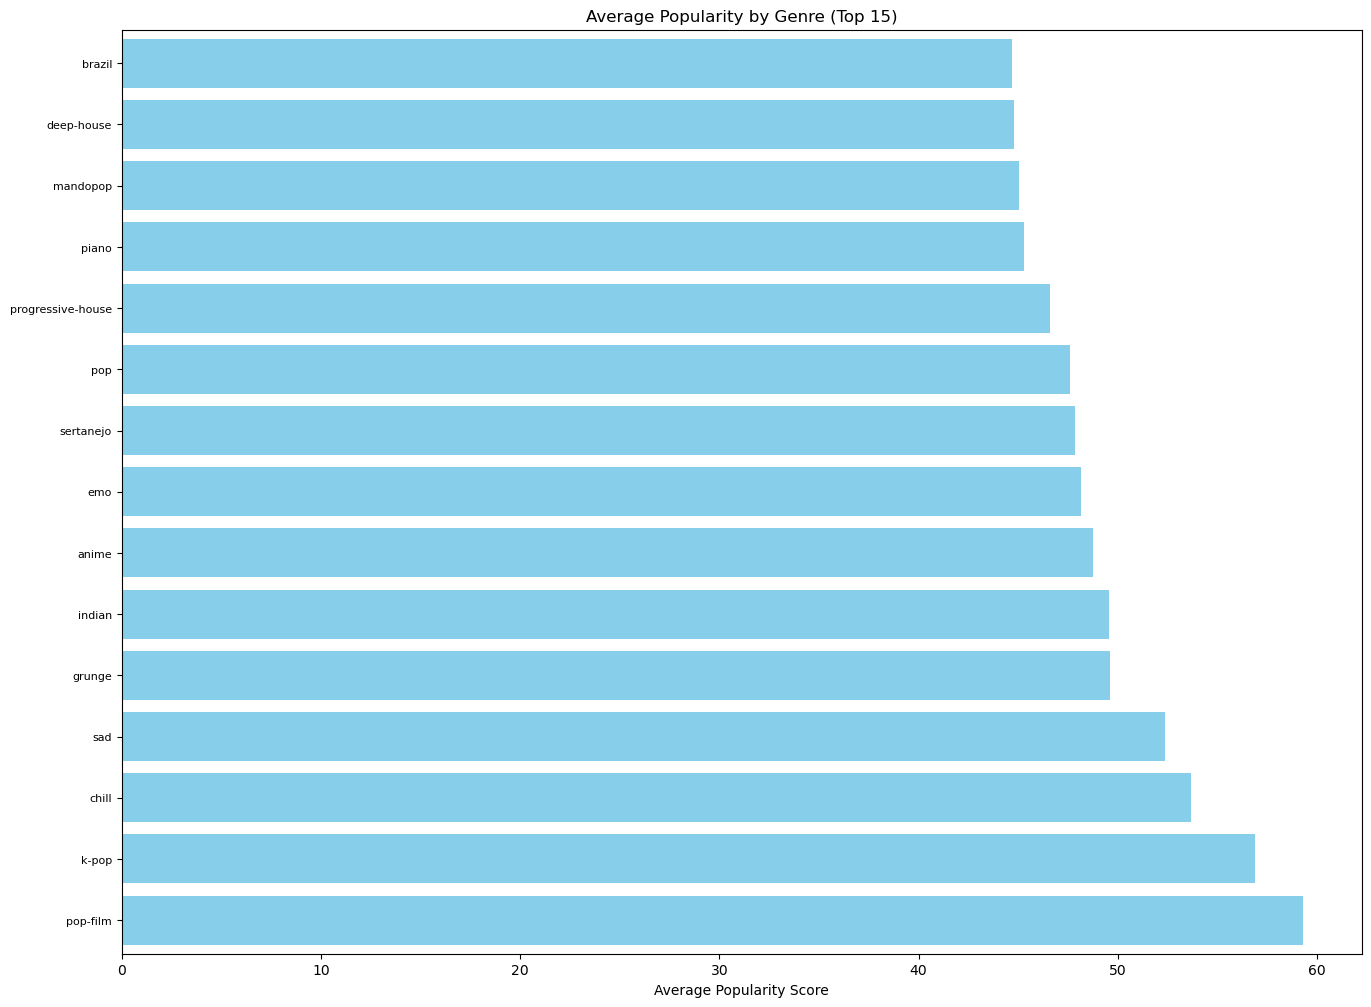

In [54]:
fig, axes = plt.subplots(1, 1, figsize=(16, 12))

# Plot 1: Average Popularity by Genre (Top 15)
if 'track_genre' in df.columns:
    genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
    axes.barh(range(len(genre_popularity)), genre_popularity.values, color='skyblue')
    axes.set_yticks(range(len(genre_popularity)))
    axes.set_yticklabels(genre_popularity.index, fontsize=8)
    axes.set_title('Average Popularity by Genre (Top 15)')
    axes.set_xlabel('Average Popularity Score')
    axes.margins(y=0.01)
